In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import simulation
import NewDataStructures
import macho_interface

/home/lucas/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Training set

In [3]:
macho_ds = macho_interface.MachoDataSet('/media/lucas/115d830f-0d51-49ad-8a2f-84544fbab639/MACHO_LMC','/media/lucas/115d830f-0d51-49ad-8a2f-84544fbab639/MACHO_features_Harmonics')
#set cluster radius number of targets and cluster radius
cluster_radius = 0.1
n_targets = 100
n_components = 5
k = 2

In [4]:
ts_data, ts_ids, cols, classes = simulation.get_macho_ts(None)
target_candidates = np.where((classes == 2) | (classes == 3) | (classes == 4) | (classes == 8))[0]
ts_target_indices = np.random.choice(target_candidates, n_targets, replace=False)
ts_data_indices = list(set(np.arange(len(ts_data))) - set(ts_target_indices))
ts_targets = ts_data[ts_target_indices]
ts_target_ids = ts_ids[ts_target_indices]
ts_data = ts_data[ts_data_indices]
ts_ids = ts_ids[ts_data_indices]

In [5]:
ts_pca = NewDataStructures.LucasPCA(n_components)
ts_pca_data =  ts_pca.fit_transform(ts_data)
ts_pca_targets = ts_pca.transform(ts_targets)

(64,)


In [6]:
ts_model = NewDataStructures.OurMethod(ts_pca_data, ts_ids, cluster_radius, None, False)

In [7]:
ts_target_indices = []
i = 0
while(len(ts_target_indices) < 10):
    target = macho_interface.MachoLightcurve(ts_target_ids[i],'B', macho_ds)
    try:
        target.features
        ts_target_indices.append(i)
    except:
        print 'Error'
    i += 1

ts_target_indices

Error
Error
Error
Error
Error
Error
Error


[0, 1, 4, 6, 11, 12, 13, 14, 15, 16]

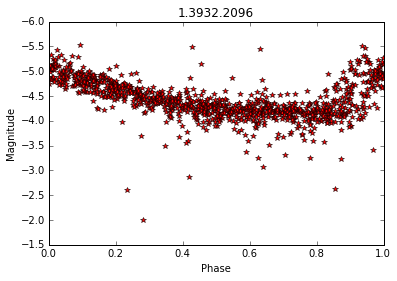

ValueError


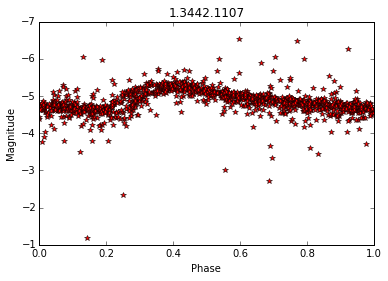

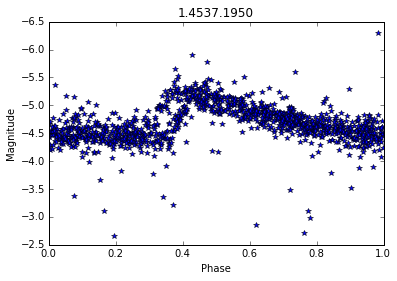

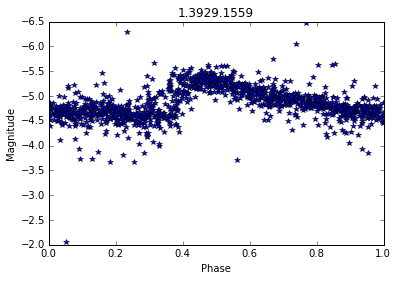

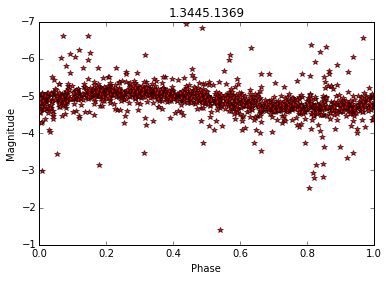

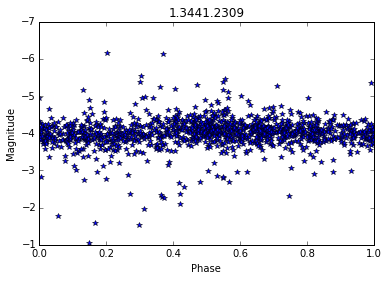

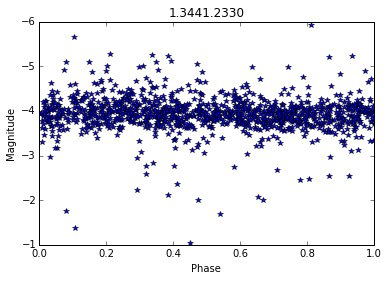

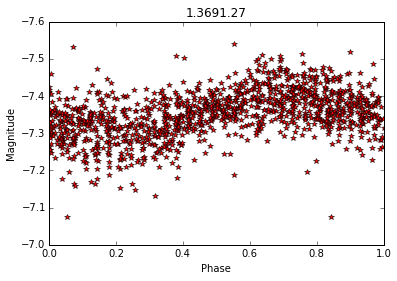

ValueError


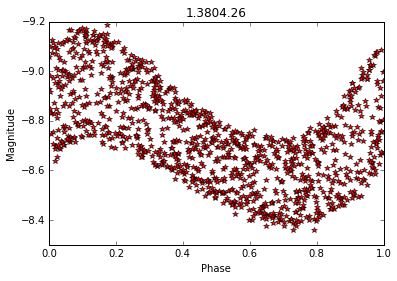

ValueError


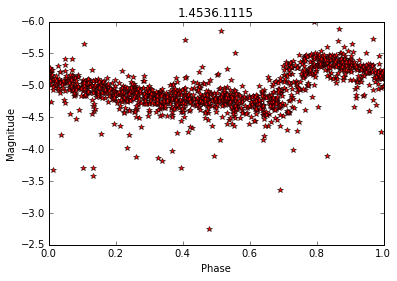

ValueError


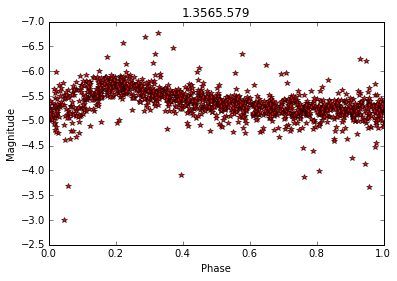

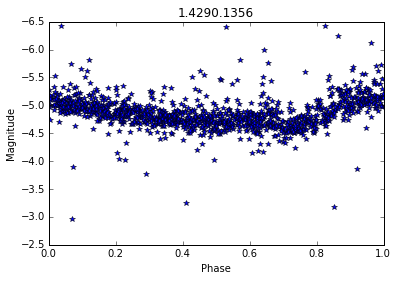

ValueError


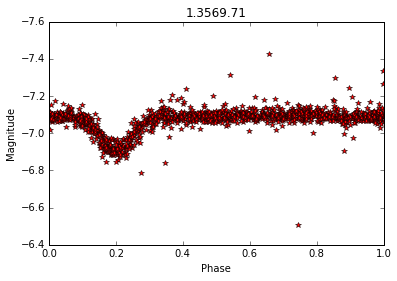

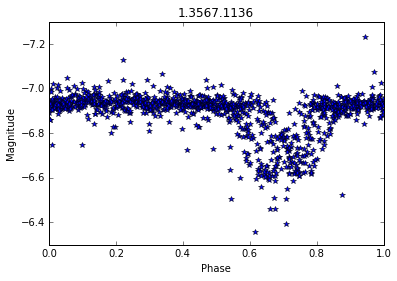

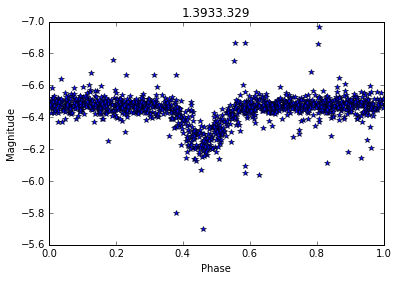

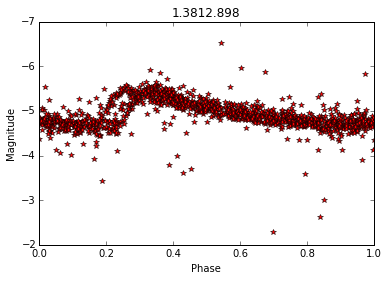

ValueError


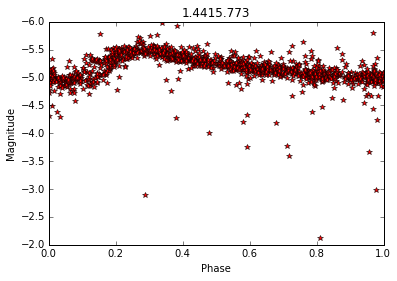

ValueError


IndexError: index 10 is out of bounds for axis 0 with size 10

In [8]:
ts_pca_targets = ts_pca_targets[ts_target_indices]
ts_target_ids = ts_target_ids[ts_target_indices]

for index in range(n_targets):
    try:
        target_data = ts_pca_targets[index]
        #print('target id')
        #print(target_ids[index])
        target = macho_interface.MachoLightcurve(ts_target_ids[index],'B', macho_ds)
        nn_ids, nn_distances = ts_model.query(target_data, k)
        target.plot_folded('red')
        for nn_id in nn_ids:
            nn = macho_interface.MachoLightcurve(nn_id,'B', macho_ds)
            nn.plot_folded('blue')
    except IOError:
        print 'IOError'
    except ValueError:
        print 'ValueError'

#Field 1 data set

In [13]:
cluster_radius = 3.4

f1_data, f1_ids, cols = simulation.get_macho_field('/media/lucas/115d830f-0d51-49ad-8a2f-84544fbab639/MACHO_features_Harmonics', 1, True)

f1_pca = NewDataStructures.LucasPCA(n_components)
f1_pca_data =  f1_pca.fit_transform(f1_data)
f1_pca_targets = f1_pca.transform(ts_targets)
model = NewDataStructures.OurMethod(f1_data, f1_ids, cluster_radius, None, False)

(64,)


MemoryError: 

In [11]:
for index in range(n_targets):
    try:
        target_data = f1_pca_targets[index]
        target = macho_interface.MachoLightcurve(ts_target_ids[index],'B', macho_ds)
        nn_ids, nn_distances = model.query(target_data, k)
        target.plot_folded('red')
        for nn_id in nn_ids:
            nn = macho_interface.MachoLightcurve(nn_id,'B', macho_ds)
            nn.plot_folded('blue')
    except IOError:
        print 'IOError'
    except ValueError:
        print 'ValueError'

array([], dtype=float64)